In [5]:
import json
import string
import sys

import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import geopandas as gpd



In [58]:
df = pd.read_csv('/content/drive/MyDrive/data/databds.csv')
df.info()
df = df[df['price'] < 1e12]
df = df[df['square'] < 1e4]
df = df[df['price/square'] < 2e9]
df = df[df['price/square'] > 2e6]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  29065 non-null  int64  
 1   Unnamed: 0    29065 non-null  int64  
 2   link          29065 non-null  object 
 3   title         29003 non-null  object 
 4   estate_type   29065 non-null  object 
 5   province      29065 non-null  object 
 6   district      29065 non-null  object 
 7   ward          29065 non-null  object 
 8   price         29065 non-null  float64
 9   square        29065 non-null  float64
 10  post_date     29065 non-null  object 
 11  describe      29065 non-null  object 
 12  numb_bedroom  23415 non-null  float64
 13  numb_toilet   21158 non-null  float64
 14  numb_floor    24183 non-null  float64
 15  price/square  29065 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 3.5+ MB


In [13]:
# Ta xem xét các giá trị khác biệt của một số trường
print(f'Có {df["estate_type"].nunique()} kiểu bất động sản, bao gổm: {"; ".join(df["estate_type"].dropna().unique())}')
print(f'Có {df["district"].nunique()} quận/huyện/thị xã xuất hiện trên tổng số 30 quận/huyện/thị xã của Hà Nội')
print(f'Có {df["ward"].nunique()} phường/xã/thị trấn xuất hiện trên tổng số 579 phường/xã/thị trấn của Hà Nội')

Có 9 kiểu bất động sản, bao gổm: căn hộ chung cư; nhà riêng; đất nền dự án; nhà mặt phố; nhà biệt thự liền kề; đất; nhà đất; trang trại khu nghỉ dưỡng; kho nhà xưởng
Có 30 quận/huyện/thị xã xuất hiện trên tổng số 30 quận/huyện/thị xã của Hà Nội
Có 330 phường/xã/thị trấn xuất hiện trên tổng số 579 phường/xã/thị trấn của Hà Nội


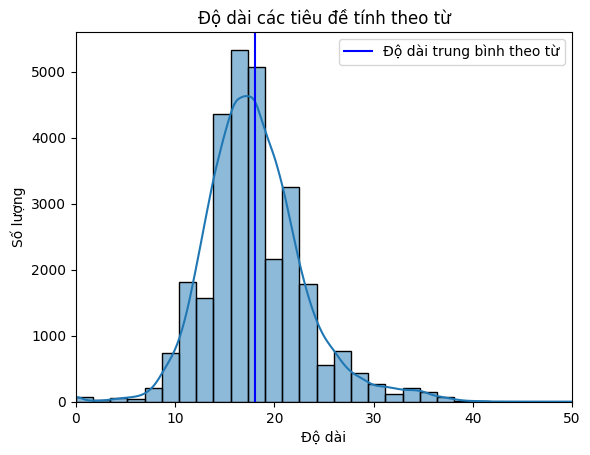

In [8]:
# Độ dài các tiêu đề
title_lens = df['title'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.title('Độ dài các tiêu đề tính theo từ')
sns.histplot(title_lens, kde=True, bins=30)
plt.axvline(x=title_lens.mean(), color='b', label='Độ dài trung bình theo từ')
plt.annotate(text=f'Max = {title_lens.max()}', xy=(40, 45_000))
plt.annotate(text=f'Min = {title_lens.min()}', xy=(40, 40_000))
plt.xlim(0, 50)
plt.xlabel('Độ dài')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

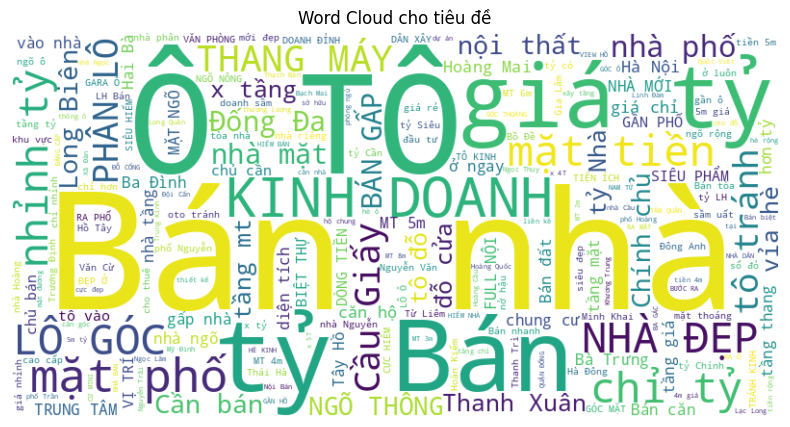

In [9]:
titles_text = ' '.join(df['title'].dropna())
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho tiêu đề')
plt.show()

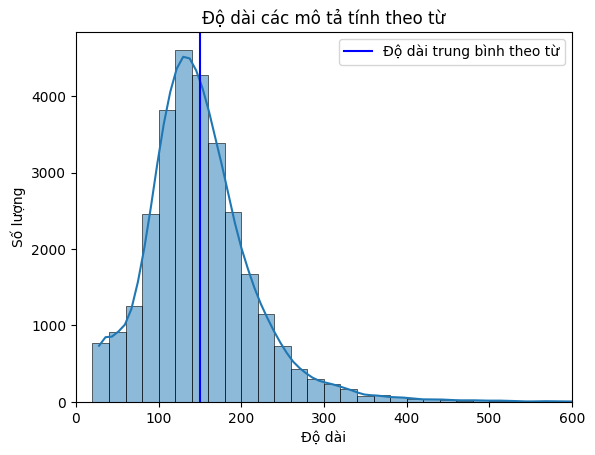

In [11]:
# Độ dài các mô tả
describe_lens = df['describe'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.title('Độ dài các mô tả tính theo từ')
sns.histplot(describe_lens, kde=True, bins=30, binrange=[0, 600])
plt.axvline(x=describe_lens.mean(), color='b', label='Độ dài trung bình theo từ')
plt.annotate(text=f'Max = {describe_lens.max()}', xy=(400, 30_000))
plt.annotate(text=f'Min = {describe_lens.min()}', xy=(400, 25_000))
plt.xlim(0, 600)
plt.xlabel('Độ dài')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

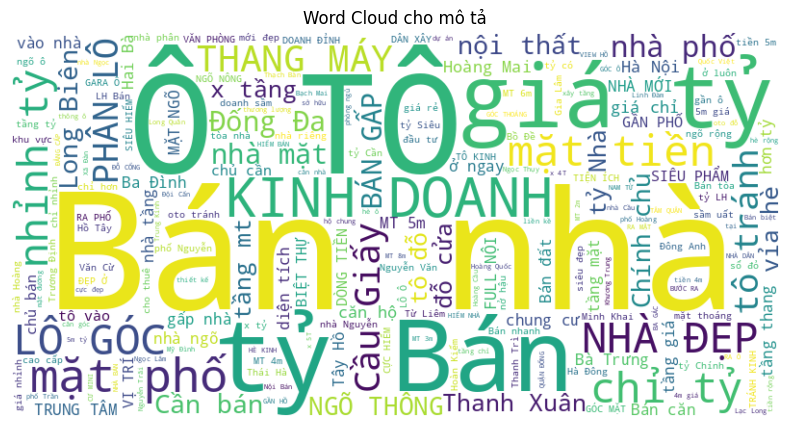

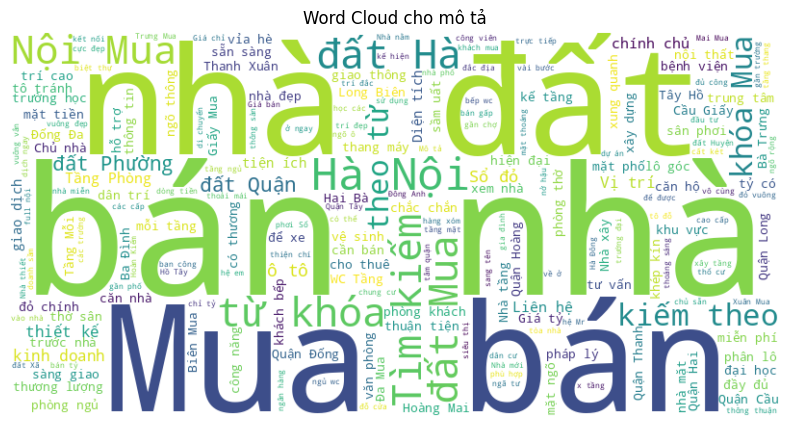

In [13]:
describe_text = ' '.join(df['describe'].dropna())
describe_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(describe_text)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho mô tả')
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(describe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho mô tả')
plt.show()

In [7]:
# Data frame đếm số bất động sản được rao bán tại một đơn vị hành chính
quantity_by_administrative_unit_df = df[['province', 'district']]
quantity_by_administrative_unit_df['quantity'] = 1
quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.groupby(['province', 'district']).count().reset_index()

# quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.sort_values('quantity', ascending=False)
quantity_by_administrative_unit_df


<ipython-input-7-5b173148ceeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity_by_administrative_unit_df['quantity'] = 1


,province,district,quantity
0,Hà Nội,Huyện Ba Vì,12
1,Hà Nội,Huyện Chương Mỹ,25
2,Hà Nội,Huyện Gia Lâm,667
3,Hà Nội,Huyện Hoài Đức,214
4,Hà Nội,Huyện Mê Linh,39
5,Hà Nội,Huyện Mỹ Đức,5
6,Hà Nội,Huyện Phú Xuyên,3
7,Hà Nội,Huyện Phúc Thọ,2
8,Hà Nội,Huyện Quốc Oai,27
9,Hà Nội,Huyện Sóc Sơn,176


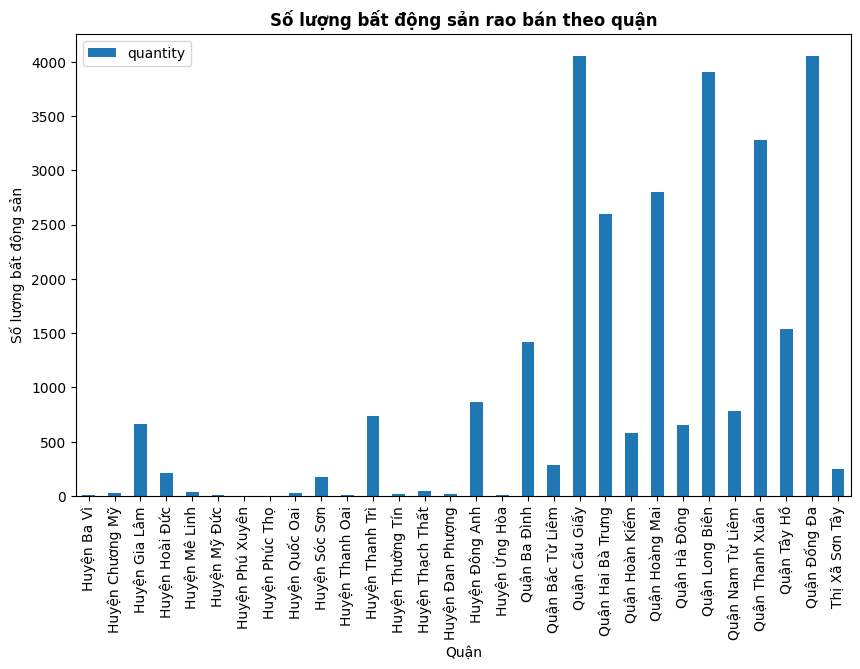

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 6))
quantity_by_administrative_unit_df.plot(kind='bar', x='district', y='quantity', ax=ax, rot=90)
ax.set_xlabel('Quận')
ax.set_ylabel('Số lượng bất động sản')
ax.set_title('Số lượng bất động sản rao bán theo quận', fontweight='bold')
plt.show()

In [23]:
desired_districts = ['Quận Hai Bà Trưng', 'Quận Thanh Xuân', 'Quận Đống Đa', 'Quận Hoàng Mai', 'Quận Hoàn Kiếm', 'Quận Cầu Giấy', 'Quận Ba Đình']

# Data frame đếm số bất động sản được rao bán tại một đơn vị hành chính
quantity_by_administrative_unit_df = df[df['district'].isin(desired_districts)][['province', 'district', 'ward']]
quantity_by_administrative_unit_df['quantity'] = 1
quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.groupby(['province', 'district', 'ward']).count().reset_index()

quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.sort_values('quantity', ascending=False)
quantity_by_administrative_unit_df

,province,district,ward,quantity
20,Hà Nội,Quận Cầu Giấy,Phường Trung Hoà,735
105,Hà Nội,Quận Đống Đa,Phường Ô Chợ Dừa,653
76,Hà Nội,Quận Thanh Xuân,Phường Khương Trung,635
14,Hà Nội,Quận Cầu Giấy,Phường Dịch Vọng,615
79,Hà Nội,Quận Thanh Xuân,Phường Nhân Chính,601
...,...,...,...,...
30,Hà Nội,Quận Hai Bà Trưng,Phường Ngô Thì Nhậm,18
4,Hà Nội,Quận Ba Đình,Phường Nguyễn Trung Trực,16
49,Hà Nội,Quận Hoàn Kiếm,Phường Hàng Bồ,15
50,Hà Nội,Quận Hoàn Kiếm,Phường Hàng Gai,12


<ipython-input-33-1888d7641aae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(quantity_by_administrative_unit_df, x='quantity', y='district', inner='stick', palette='Dark2')


Text(0.5, 1.0, 'Biểu đồ phân phối số lượng bất động sản theo quận')

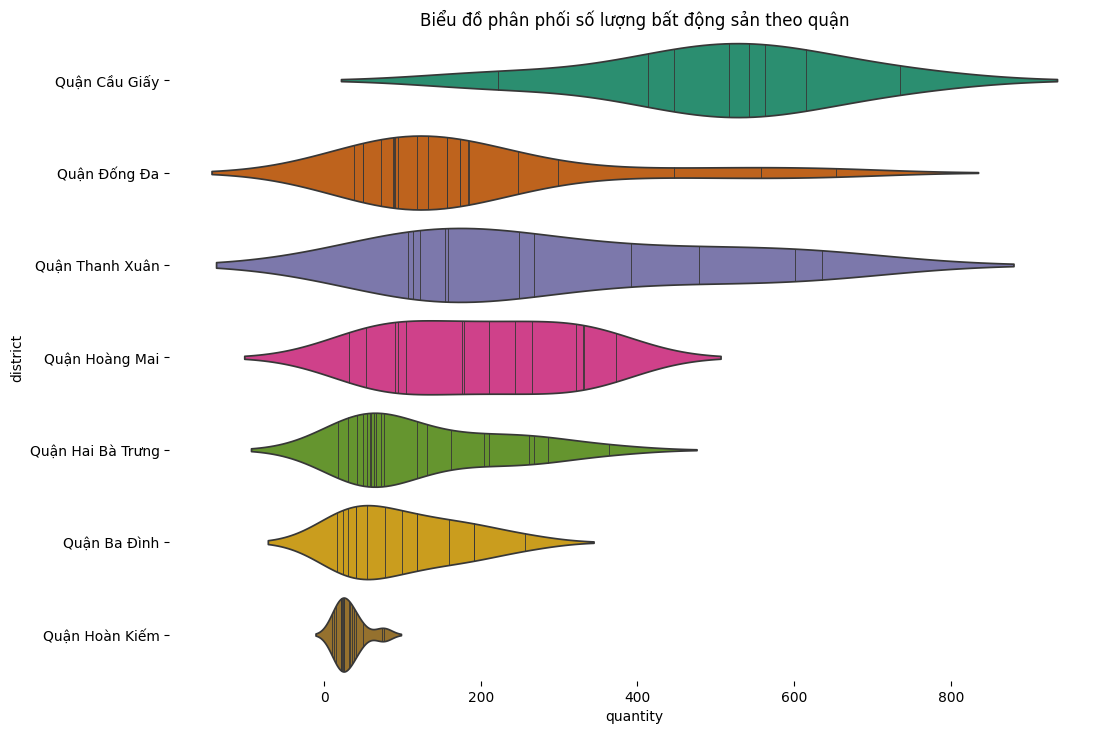

In [33]:

figsize = (12, 1.2 * len(quantity_by_administrative_unit_df['district'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(quantity_by_administrative_unit_df, x='quantity', y='district', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.gca().set_title('Biểu đồ phân phối số lượng bất động sản theo quận')

In [25]:
df['estate_type'].value_counts()

estate_type
nhà riêng                    17912
nhà mặt phố                   5302
căn hộ chung cư               2270
đất                           2193
nhà biệt thự liền kề          1150
đất nền dự án                  109
nhà đất                         80
trang trại khu nghỉ dưỡng       34
kho nhà xưởng                   15
Name: count, dtype: int64

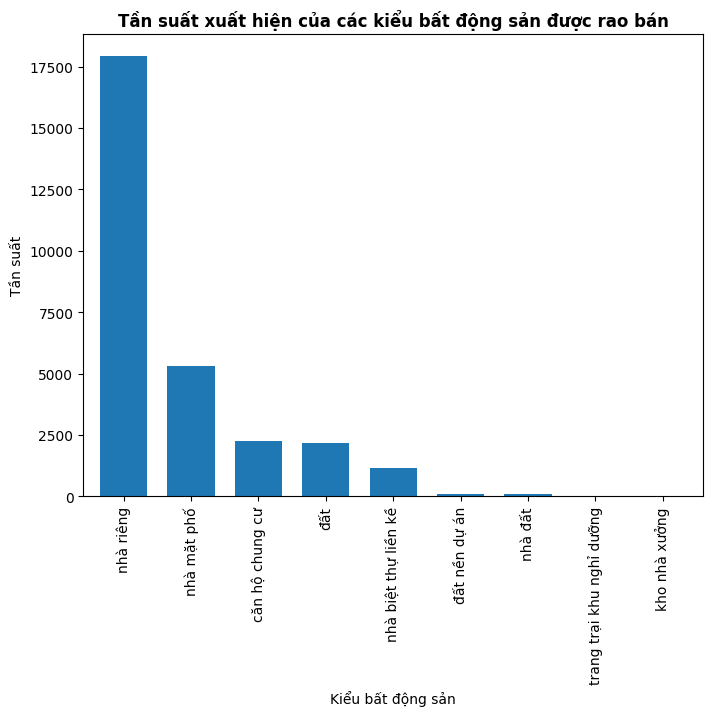

In [24]:
fig, ax = plt.subplots(1, figsize=(8, 6))
estate_type_counts = df['estate_type'].value_counts()
estate_type_counts.plot(kind='bar', ax=ax, rot=90, width=0.7)
ax.set_title('Tần suất xuất hiện của các kiểu bất động sản được rao bán', fontweight='bold')
ax.set_xlabel('Kiểu bất động sản')
ax.set_ylabel('Tần suất')
plt.show()

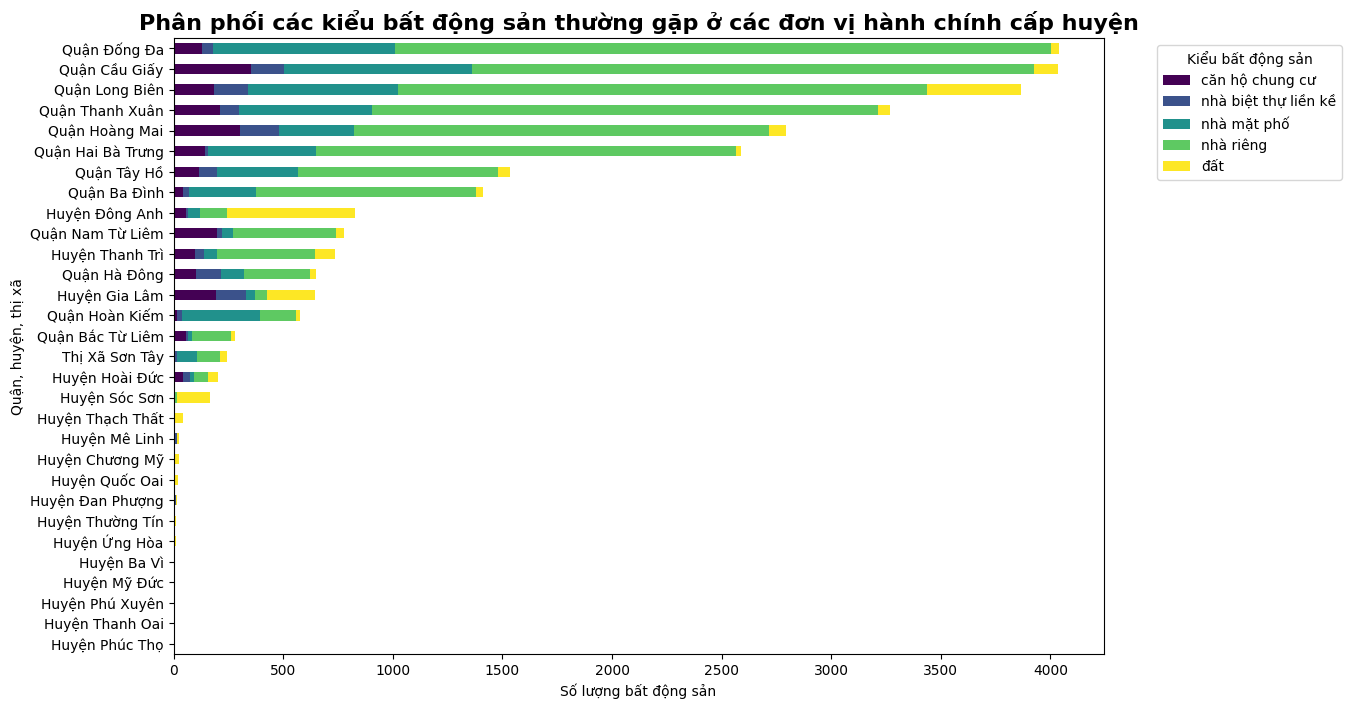

In [29]:
# Ta chỉ quan tâm tới một số kiểu bất động sản
desired_estate_type = ['nhà riêng', 'nhà mặt phố' , 'căn hộ chung cư', 'đất', 'nhà biệt thự liền kề',]
filtered_df = df[df['estate_type'].isin(desired_estate_type) & ~df['estate_type'].isna()]
# Tạo Dataframe với các cột là kiểu bất động sản quan tâm và dòng là các quận, huyện
district_estate_counts = filtered_df.groupby(['district', 'estate_type']).size().unstack().fillna(0)
# Sắp xếp các quận huyện theo thứ tự số lượng bất động sản
district_totals = district_estate_counts.sum(axis=1)
sorted_districts = district_totals.sort_values(ascending=True).index
district_estate_counts = district_estate_counts.loc[sorted_districts]

# Vẽ biểu đồ stacked bar
fig, ax = plt.subplots(1, figsize=(12, 8))
district_estate_counts.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Phân phối các kiểu bất động sản thường gặp ở các đơn vị hành chính cấp huyện', fontweight='bold', fontsize=16)
ax.set_xlabel('Số lượng bất động sản')
ax.set_ylabel('Quận, huyện, thị xã')
ax.legend(title='Kiểu bất động sản', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
# Data frame đếm số chung cư được rao bán tại một đơn vị hành chính
quantity_by_administrative_unit_df = df[df['estate_type'] == 'căn hộ chung cư'][['province', 'district']]
quantity_by_administrative_unit_df['quantity'] = 1
quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.groupby(['province', 'district']).count().reset_index()

quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.sort_values('quantity', ascending=False)
quantity_by_administrative_unit_df

,province,district,quantity
9,Hà Nội,Quận Cầu Giấy,352
12,Hà Nội,Quận Hoàng Mai,303
16,Hà Nội,Quận Thanh Xuân,212
15,Hà Nội,Quận Nam Từ Liêm,197
0,Hà Nội,Huyện Gia Lâm,192
14,Hà Nội,Quận Long Biên,184
10,Hà Nội,Quận Hai Bà Trưng,145
18,Hà Nội,Quận Đống Đa,132
17,Hà Nội,Quận Tây Hồ,115
13,Hà Nội,Quận Hà Đông,103


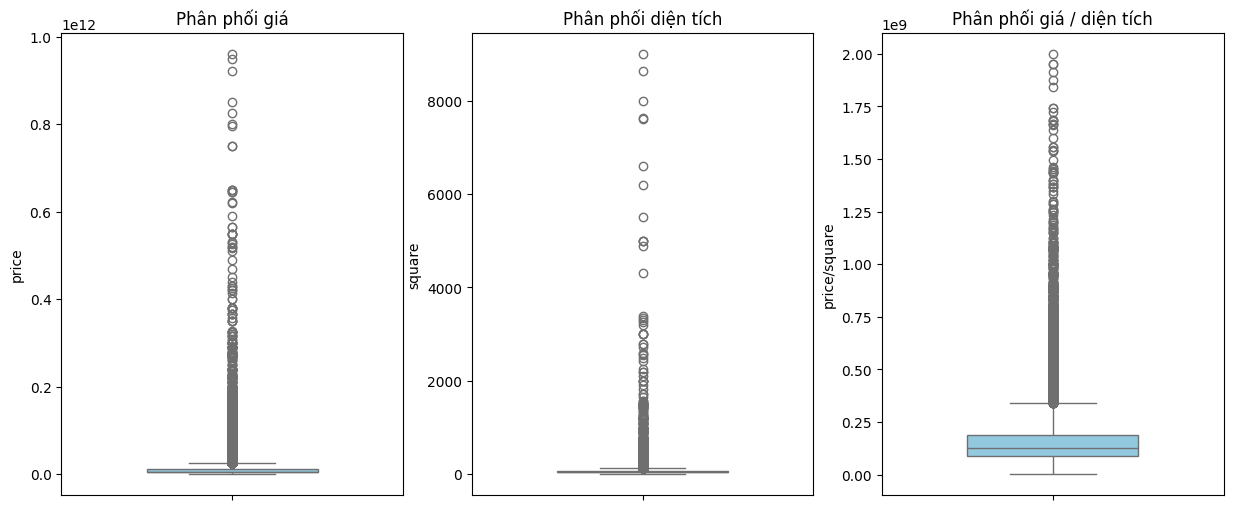

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(y='price', data=df, ax=ax[0], color='skyblue', width=0.5)
ax[0].set_title('Phân phối giá')
sns.boxplot(y='square', data=df, ax=ax[1], color='skyblue', width=0.5)
ax[1].set_title('Phân phối diện tích')
sns.boxplot(y='price/square', data=df, ax=ax[2], color='skyblue', width=0.5)
ax[2].set_title('Phân phối giá / diện tích')
plt.show()

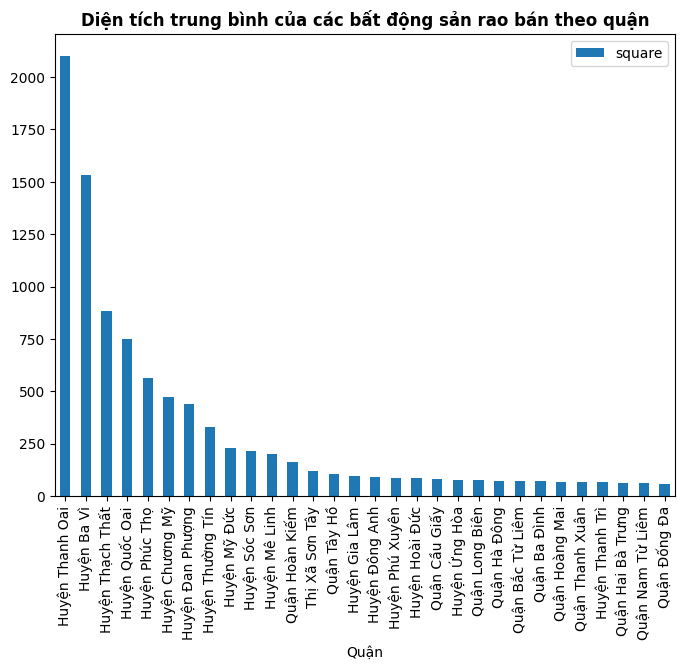

In [40]:
mean_area_by_administrative_unit_df = df[['province', 'district', 'square']]
mean_area_by_administrative_unit_df = mean_area_by_administrative_unit_df.groupby(['province', 'district']).mean().reset_index().sort_values('square', ascending=False)

fig, ax = plt.subplots(1, figsize=(8, 6))
mean_area_by_administrative_unit_df.plot(kind='bar', x='district', y='square', ax=ax)
ax.set_xlabel('Quận')
ax.set_title('Diện tích trung bình của các bất động sản rao bán theo quận', fontweight='bold')
plt.show()

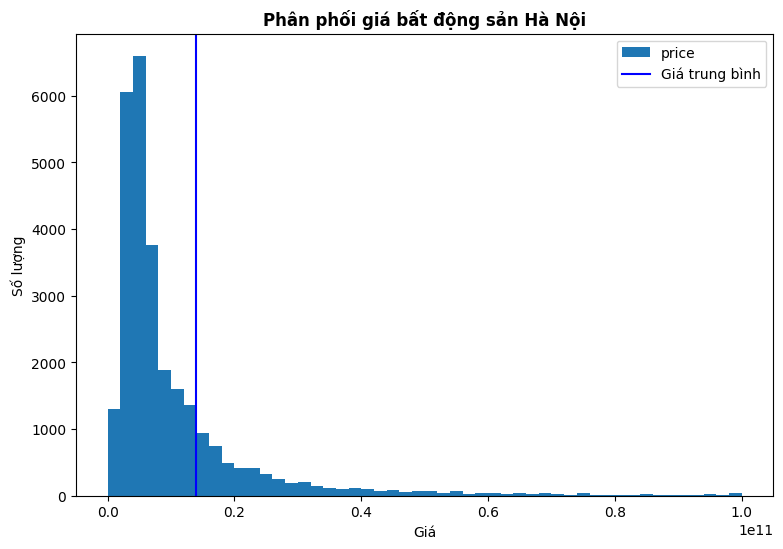

In [41]:
fig, ax = plt.subplots(1, figsize=(9, 6))
df['price'].plot(kind='hist', bins=50, range=(0, 1e11), ax=ax)
ax.axvline(x=df['price'].mean(), color='b', label='Giá trung bình')
ax.annotate(text=f'Max = {df["price"].max()}', xy=(0.6e11, 35_000))
ax.annotate(text=f'Min = {df["price"].min()}', xy=(0.6e11, 30_000))
ax.set_title('Phân phối giá bất động sản Hà Nội', fontweight='bold')
ax.set_xlabel('Giá')
ax.set_ylabel('Số lượng')
ax.legend()
plt.show()

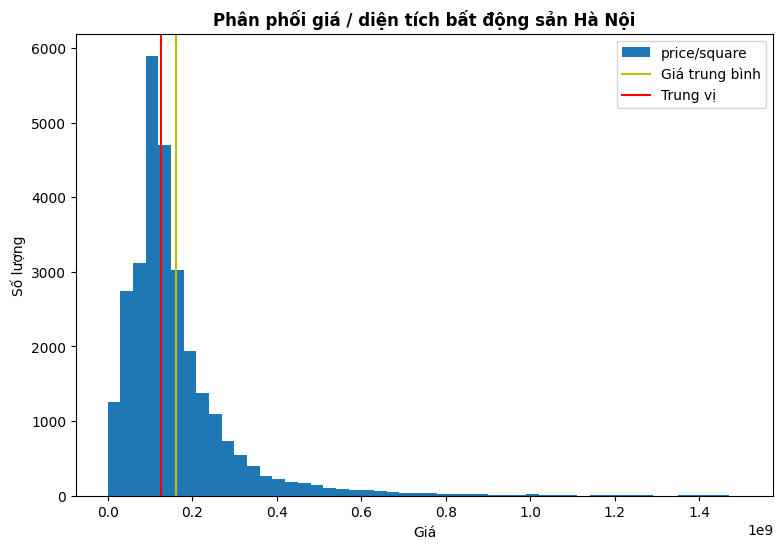

In [42]:
fig, ax = plt.subplots(1, figsize=(9, 6))
df['price/square'].plot(kind='hist', bins=50, range=(0, 1.5e9), ax=ax)
ax.axvline(x=df['price/square'].mean(), color='y', label='Giá trung bình')
ax.axvline(x=df['price/square'].median(), color='r', label='Trung vị')
ax.annotate(text=f'Max = {df["price/square"].max()}', xy=(1e9, 30_000))
ax.annotate(text=f'Min = {df["price/square"].min()}', xy=(1e9, 25_000))
ax.set_title('Phân phối giá / diện tích bất động sản Hà Nội', fontweight='bold')
ax.set_xlabel('Giá')
ax.set_ylabel('Số lượng')
ax.legend()
plt.show()

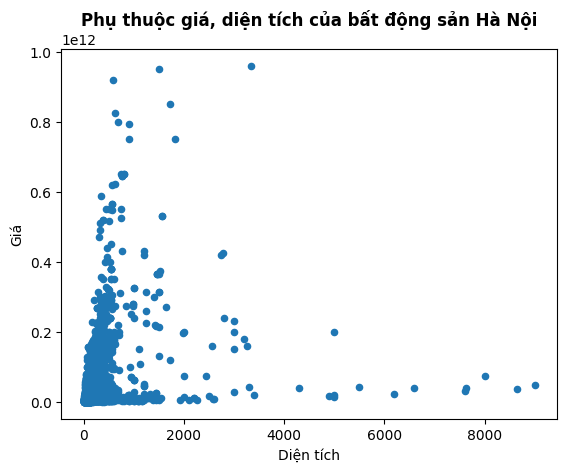

In [43]:
df.plot(kind='scatter', x='square', y='price')
plt.title('Phụ thuộc giá, diện tích của bất động sản Hà Nội', fontweight='bold')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

<ipython-input-55-d286ea07f5b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='estate_type', y='price/square', data=filtered_df, palette='Set3')


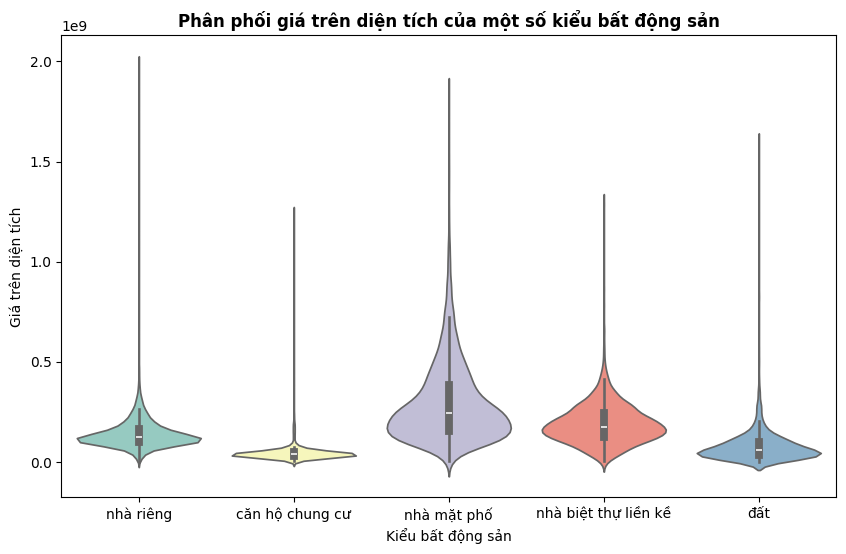

In [55]:
# Ta chỉ quan tâm tới một số kiểu bất động sản
desired_estate_type = ['nhà riêng', 'nhà mặt phố' , 'căn hộ chung cư', 'đất', 'nhà biệt thự liền kề',]
filtered_df = df[df['estate_type'].isin(desired_estate_type) & ~df['estate_type'].isna()]

fig, ax = plt.subplots(1, figsize=(10, 6))
sns.violinplot(x='estate_type', y='price/square', data=filtered_df, palette='Set3')
# plt.yscale('log')
ax.set_xlabel('Kiểu bất động sản')
ax.set_ylabel('Giá trên diện tích')
ax.set_title('Phân phối giá trên diện tích của một số kiểu bất động sản', fontweight='bold')
plt.show()

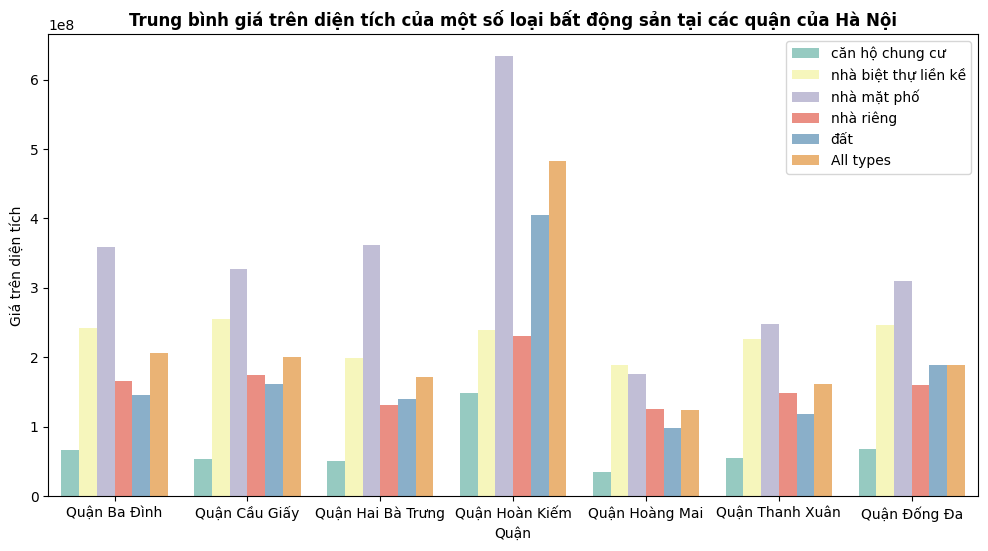

In [57]:
desired_estate_type = ['nhà riêng', 'nhà mặt phố' , 'căn hộ chung cư', 'đất', 'nhà biệt thự liền kề',]
desired_districts = ['Quận Hai Bà Trưng', 'Quận Thanh Xuân', 'Quận Đống Đa', 'Quận Hoàng Mai', 'Quận Hoàn Kiếm', 'Quận Cầu Giấy', 'Quận Ba Đình']
df_chosen = df[df['district'].isin(desired_districts) & df['estate_type'].isin(desired_estate_type)][['district', 'estate_type', 'price/square']]
chosen_mean_price_over_square = df_chosen.groupby(['district', 'estate_type']).mean().reset_index()
mean_price_over_square = df[df['district'].isin(desired_districts)][['district', 'price/square']].groupby(['district']).mean().reset_index()
mean_price_over_square['estate_type'] = 'All types'

combined_df = pd.concat([chosen_mean_price_over_square, mean_price_over_square])



fig, ax = plt.subplots(1, figsize=(12,6))
ax = sns.barplot(x='district', y='price/square', hue='estate_type', data=combined_df, errorbar=('ci', 95), palette='Set3')
# sns.barplot(x='district', y='price/square', data=df_chosen, ci=None, color='gray', alpha=0.7, dodge=True)
ax.set_title('Trung bình giá trên diện tích của một số loại bất động sản tại các quận của Hà Nội', fontweight='bold')
ax.set_xlabel('Quận')
ax.set_ylabel('Giá trên diện tích')
ax.legend()
plt.show()